### **Necessary Imports**

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

### **Gathering Dataset**

Loading the Data

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)


### **Instantiate or Build the Model**

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation= 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### **Compile & Train the model**

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2921 - acc: 0.9148 - val_loss: 0.1381 - val_acc: 0.9590
Epoch 2/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.1403 - acc: 0.9579 - val_loss: 0.0970 - val_acc: 0.9705
Epoch 3/10
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1055 - acc: 0.9671 - val_loss: 0.0852 - val_acc: 0.9748
Epoch 4/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0869 - acc: 0.9735 - val_loss: 0.0771 - val_acc: 0.9756
Epoch 5/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0750 - acc: 0.9764 - val_loss: 0.0760 - val_acc: 0.9772
Epoch 6/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0652 - acc: 0.9789 - val_loss: 0.0753 - val_acc: 0.9776
Epoch 7/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0588 - acc: 0.9810 - val_l

##### **Plotting Loss per Iteration**


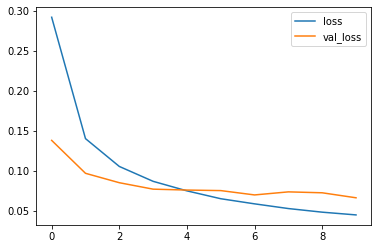

In [7]:
plt.plot(r.history['loss'], label= 'loss')
plt.plot(r.history['val_loss'], label= 'val_loss')
plt.legend()

##### **Plotting Accuracy per Iteration**


In [14]:
plt.plot(r.history['accuracy'], label= 'accuracy')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()

KeyError: 'accuracy'

#### **Model Evaluation**

In [9]:
print(model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 77us/sample - loss: 0.0663 - acc: 0.9799
[0.06633542306605378, 0.9799]


#### **Confusion Matrix**

Confusion matrix without normalization
[[ 968    0    1    2    2    2    3    1    1    0]
 [   0 1124    2    2    0    0    1    1    5    0]
 [   4    0 1007    5    2    0    2    6    6    0]
 [   0    0    3  994    0    6    0    3    2    2]
 [   1    0    4    0  967    0    5    0    1    4]
 [   2    0    0    7    0  874    3    1    3    2]
 [   3    3    0    1    3    5  942    0    1    0]
 [   0    4    9    3    0    0    0 1004    2    6]
 [   3    0    3    7    5    4    2    4  943    3]
 [   2    2    0    8   12    2    0    2    5  976]]


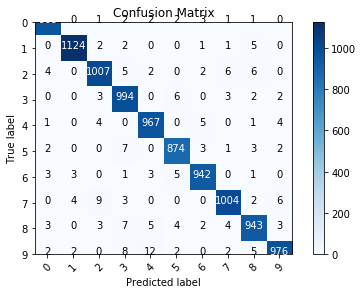

In [10]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title="Confusion Matrix",
                          cmap = plt.cm.Blues):
  
  """
  This function prints and plots the confusion matrix.
  Normalize can be applied by setting 'normalize = True'
  """
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  
  else:
    print("Confusion matrix without normalization")
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment = 'center',
             color = "white" if cm[i, j] > thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))           

##### **Do these results make sense?**
- It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

### **Plotting few Places where the Model went wrong**

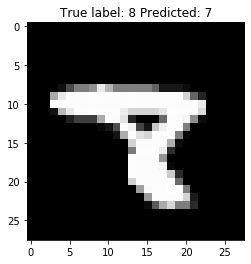

In [11]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));